1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [13]:
import numpy as np
import pandas as pd
open_file=pd.read_csv(r"E:\360Downloads\DaSE\数据科学与工程导论\open_rank_20236.csv")
item=open_file.iloc[:,0:3]
item.columns=['name','rank','value']
max_value=item['value'].max()
min_value=item['value'].min()
aver_value=item['value'].mean()
mid_value=item['value'].median()
print("最大值：",max_value)
print("最小值：",min_value)
print("平均值：",aver_value.round(2))
print("中位数：",mid_value.round(2))

最大值： 1394.45
最小值： 200.68
平均值： 346.97
中位数： 273.67


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [167]:
import numpy as np
import pandas as pd
open_file=pd.read_csv(r"E:\360Downloads\DaSE\数据科学与工程导论\activity_2022.csv")
item=open_file.iloc[:]
increasing_rate_matrix=[]
for i in range(len(item)):
    row_vector=[]
    for j in range(2,len(item.columns)):
        rate=(item.iloc[i,j]-item.iloc[i,j-1])/item.iloc[i,j-1]
        row_vector.append(rate.round(4))
    increasing_rate_matrix.append(row_vector)
increasing_rate_matrix=np.array(increasing_rate_matrix)
df=pd.DataFrame(increasing_rate_matrix)
df.index=item.iloc[:,0]
df.columns=[f"第{i}月增长率" for i in range(2,len(item.columns))]
df['平均增长率']=(df.mean(axis=1)).round(4)
print(df)
with open(r"E:\360Downloads\DaSE\数据科学与工程导论\Homework6 (2).txt","w",encoding="utf-8") as f:
    f.write(str(df))

                                        第2月增长率  第3月增长率  第4月增长率  第5月增长率  \
repo                                                                     
MicrosoftDocs/azure-docs                0.0252  0.0908 -0.1616  0.0393   
NixOS/nixpkgs                          -0.1597  0.0492  0.0849 -0.0084   
dotnet/runtime                         -0.0618  0.0375 -0.0533 -0.0123   
elastic/kibana                          0.0291  0.2065 -0.1969  0.0981   
firstcontributions/first-contributions -0.2585  0.0428 -0.0884  0.3768   
flutter/flutter                         0.0236  0.0250 -0.0988  0.1687   
home-assistant/core                     0.1624 -0.1736  0.0308 -0.1019   
microsoft/vscode                        0.1226  0.0469 -0.0289  0.0128   
pytorch/pytorch                        -0.0056  0.0372  0.0461  0.0766   
rust-lang/rust                         -0.1362  0.0708  0.0442 -0.0247   

                                        第6月增长率  第7月增长率  第8月增长率  第9月增长率  \
repo                                 

3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

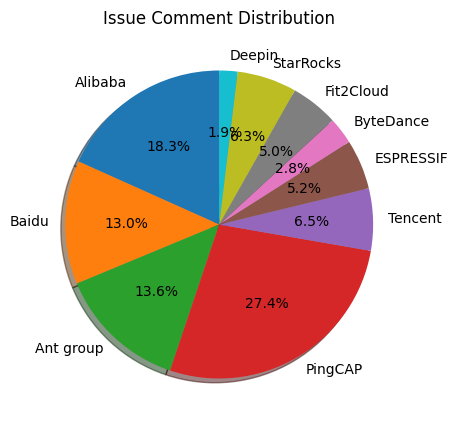

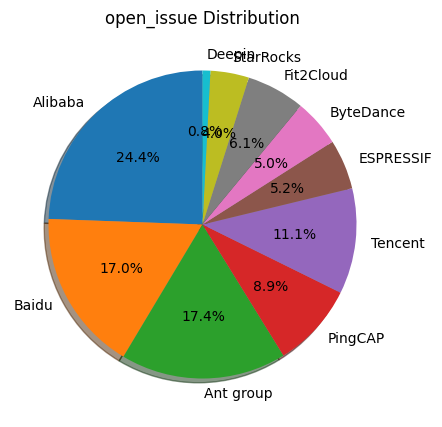

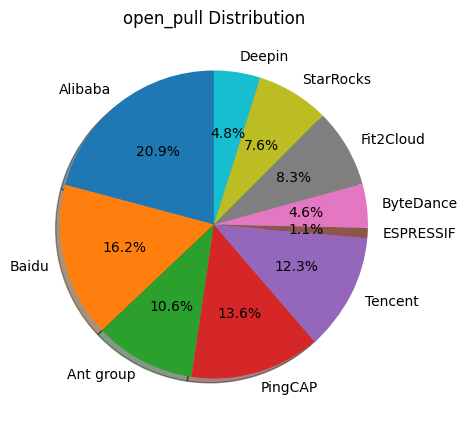

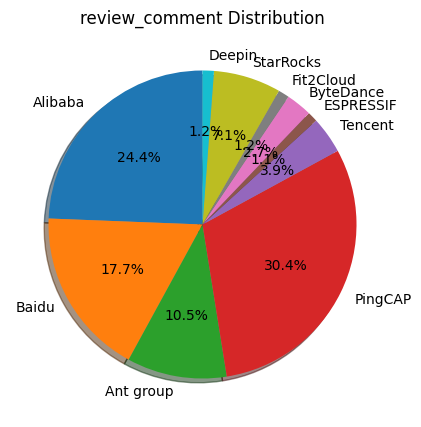

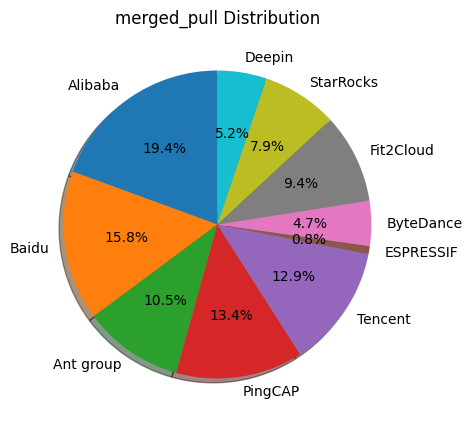

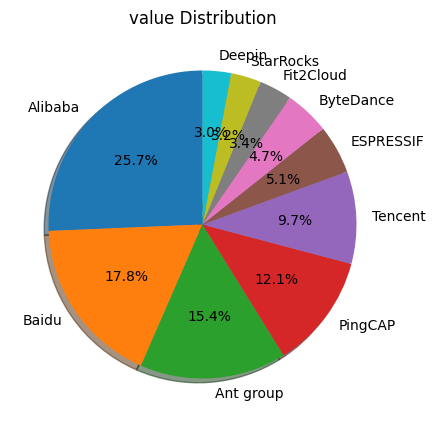

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_file=pd.read_csv(r"E:\360Downloads\DaSE\数据科学与工程导论\china_2022.csv")
issue_comment=data_file.iloc[:,0:2]
df=pd.DataFrame(issue_comment)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["issue_comment"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Issue Comment Distribution")
plt.show()

open_issue=data_file.iloc[:,[0,2]]
df=pd.DataFrame(open_issue)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["open_issue"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("open_issue Distribution")
plt.show()

open_pull=data_file.iloc[:,[0,3]]
df=pd.DataFrame(open_pull)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["open_pull"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("open_pull Distribution")
plt.show()

review_comment=data_file.iloc[:,[0,4]]
df=pd.DataFrame(review_comment)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["review_comment"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("review_comment Distribution")
plt.show()

merged_pull=data_file.iloc[:,[0,5]]
df=pd.DataFrame(merged_pull)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["merged_pull"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("merged_pull Distribution")
plt.show()

value=data_file.iloc[:,[0,7]]
df=pd.DataFrame(value)
issue_counts=df.iloc[:,0].value_counts()
plt.figure(figsize=(10,5))
plt.pie(df["value"],labels=issue_counts.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("value Distribution")
plt.show()

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank